# Source
https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24


In [1]:
import pandas as pd

In [2]:
data0 = pd.read_pickle('hepth.pd');

In [3]:
data = data0[-10000:]

In [4]:
print(data.iloc[1,2]+'\n\n'+data.iloc[1,3])

Exact solutions of a two-dimensional Duffin-Petiau-Kemmer oscillator
  subject to a coulomb potential in the gravitational field of cosmic string

In this paper, the problem of a two-dimensional Duffin-Petiau-Kemmer (DKP)
oscillator in the presence of a coulomb potential in the cosmic string
background is solved. The eigensolutions of the problem in question have been
found, and the influence of the cosmic string space-time on the eigenvalues has
been analyzed.


In [5]:
print(data.shape)
data['tabs']=data['title']+' \n '+data['abstract']
print(data.shape)

(10000, 6)
(10000, 7)


/home/sequi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
print(data.iloc[2,6])

Holographic R\'enyi entropy for two-dimensional $\mathcal{N}$=(2,2)
  superconformal field theory 
 We investigate the holographic R\'enyi entropy for two-dimensional $\mathcal
N=(2,2)$ superconformal field theory (SCFT), which is dual to $\mathcal N=2$
supergravity in AdS$_3$ background. In SCFT we have the stress tensor, current,
and their supersymmetric partners, and in supergravity we have the graviton,
vector field, and two gravitinos. We get the R\'enyi mutual information of two
short intervals on complex plane in expansion by the cross ratio $x$ to order
$x^4$, and R\'enyi entropy of one interval on torus in expansion by
$q=\exp(-2\pi\beta/L)$, with $\beta$ being the inverse temperature and $L$
being the spatial period, to order $q^2$. We calculate in both the supergravity
and SCFT sides, and find matches of the results.


In [7]:
data_text = data[['tabs']]
data_text['title'] = data[['title']]
data_text['index'] = data_text.index
documents = data_text

/home/sequi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sequi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data['index'] = data.index
print(data.shape)

(10000, 8)


/home/sequi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/sequi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result

In [12]:
doc_sample = data.iloc[1,6]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Exact', 'solutions', 'of', 'a', 'two-dimensional', 'Duffin-Petiau-Kemmer', 'oscillator\n', '', 'subject', 'to', 'a', 'coulomb', 'potential', 'in', 'the', 'gravitational', 'field', 'of', 'cosmic', 'string', '\n', 'In', 'this', 'paper,', 'the', 'problem', 'of', 'a', 'two-dimensional', 'Duffin-Petiau-Kemmer', '(DKP)\noscillator', 'in', 'the', 'presence', 'of', 'a', 'coulomb', 'potential', 'in', 'the', 'cosmic', 'string\nbackground', 'is', 'solved.', 'The', 'eigensolutions', 'of', 'the', 'problem', 'in', 'question', 'have', 'been\nfound,', 'and', 'the', 'influence', 'of', 'the', 'cosmic', 'string', 'space-time', 'on', 'the', 'eigenvalues', 'has\nbeen', 'analyzed.']


 tokenized and lemmatized document: 
['exact', 'solut', 'dimension', 'duffin', 'petiau', 'kemmer', 'oscil', 'subject', 'coulomb', 'potenti', 'gravit', 'field', 'cosmic', 'string', 'paper', 'problem', 'dimension', 'duffin', 'petiau', 'kemmer', 'dkp', 'oscil', 'presenc', 'coulomb', 'potenti', 'cosmic', 'str

In [13]:
processed_docs = data['tabs'].map(preprocess)

In [15]:
print(data['tabs'][:2])
print(processed_docs[:2])

55000    Numerical evaluation of the tensor bispectrum ...
55001    Exact solutions of a two-dimensional Duffin-Pe...
Name: tabs, dtype: object
55000    [numer, evalu, tensor, bispectrum, field, infl...
55001    [exact, solut, dimension, duffin, petiau, kemm...
Name: tabs, dtype: object


# Bag of Words on the Data set
just have a list of all the words in the dataset once processed

In [16]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
len(dictionary)

0 align
1 amplitud
2 analyt
3 bispectrum
4 character
5 class
6 compar
7 consist
8 context
9 contribut
10 curv


11726

In [17]:
dictionary.filter_extremes(no_below=15, no_above=0.95, keep_n=100000)

In [18]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
len(dictionary)

0 align
1 amplitud
2 analyt
3 bispectrum
4 character
5 class
6 compar
7 consist
8 context
9 contribut
10 curv


2585

In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [21]:
bow_doc_variable = bow_corpus[7234]
for i in range(len(bow_doc_variable)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_variable[i][0], 
                                               dictionary[bow_doc_variable[i][0]], 
                                                bow_doc_variable[i][1]))

Word 17 ("examin") appears 1 time.
Word 27 ("limit") appears 1 time.
Word 28 ("model") appears 2 time.
Word 33 ("paramet") appears 1 time.
Word 63 ("time") appears 1 time.
Word 84 ("order") appears 1 time.
Word 98 ("theori") appears 1 time.
Word 119 ("depend") appears 3 time.
Word 125 ("energi") appears 3 time.
Word 130 ("form") appears 3 time.
Word 138 ("independ") appears 1 time.
Word 214 ("zero") appears 1 time.
Word 220 ("bind") appears 1 time.
Word 226 ("compon") appears 1 time.
Word 262 ("scalar") appears 1 time.
Word 267 ("standard") appears 2 time.
Word 286 ("explor") appears 1 time.
Word 318 ("new") appears 1 time.
Word 336 ("factor") appears 3 time.
Word 343 ("lead") appears 1 time.
Word 405 ("momentum") appears 1 time.
Word 422 ("consid") appears 1 time.
Word 477 ("loop") appears 1 time.
Word 498 ("low") appears 1 time.
Word 693 ("satisfi") appears 1 time.
Word 794 ("anomal") appears 3 time.
Word 831 ("magnet") appears 4 time.
Word 869 ("extens") appears 2 time.
Word 917 ("e

In [22]:
import pickle
data.to_pickle('data/data.pickle')
with open('data/bow_corpus.pickle', 'wb') as file:
    pickle.dump(bow_corpus, file)

# Here begins the game

In [23]:
Ntopics=15

In [24]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=Ntopics, id2word=dictionary, passes=20, minimum_probability=0.00000000001, workers=2, iterations=20)

In [25]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"graviti" + 0.035*"field" + 0.030*"scalar" + 0.024*"theori" + 0.019*"coupl" + 0.017*"perturb" + 0.013*"effect" + 0.012*"inflat" + 0.012*"non" + 0.011*"scale"
Topic: 1 
Words: 0.050*"equat" + 0.029*"integr" + 0.025*"model" + 0.025*"deform" + 0.015*"solut" + 0.014*"gener" + 0.013*"quantum" + 0.013*"function" + 0.012*"matrix" + 0.010*"hamiltonian"
Topic: 2 
Words: 0.035*"phase" + 0.026*"model" + 0.022*"transit" + 0.019*"critic" + 0.015*"temperatur" + 0.014*"qcd" + 0.014*"point" + 0.012*"order" + 0.011*"lattic" + 0.011*"studi"
Topic: 3 
Words: 0.031*"field" + 0.027*"magnet" + 0.020*"effect" + 0.015*"charg" + 0.011*"electr" + 0.010*"energi" + 0.010*"chiral" + 0.010*"mode" + 0.009*"wave" + 0.009*"momentum"
Topic: 4 
Words: 0.059*"theori" + 0.030*"topolog" + 0.025*"mathcal" + 0.019*"gaug" + 0.018*"dualiti" + 0.014*"symmetri" + 0.014*"dimension" + 0.014*"group" + 0.013*"mathbb" + 0.012*"chern"
Topic: 5 
Words: 0.037*"space" + 0.019*"theori" + 0.018*"gener" + 0.014*"struc

In [23]:
import matplotlib.pyplot as plt

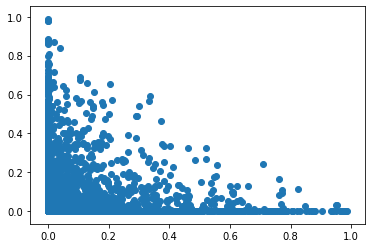

In [24]:
w=[[] for i in range(10)]
for bow in bow_corpus:
    if(len(lda_model[bow])!=Ntopics):
        print('Not all present')
    for i in range(10):
        w[i].append(float(lda_model[bow][i][1]))
plt.scatter(w[0],w[1])

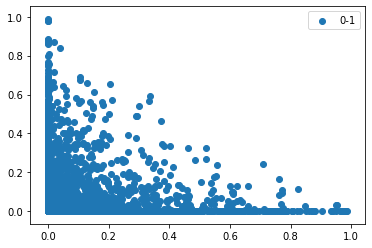

In [25]:
plt.scatter(w[0],w[1],label='0-1')
#plt.scatter(w[0],w[9],label='0-9')
plt.legend(loc='upper right')

In [26]:
lda_model.save("models/hep-th")

# Load Saved Model

In [25]:
lda_model = gensim.models.LdaMulticore.load("models/hep-th")

In [27]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"graviti" + 0.035*"field" + 0.030*"scalar" + 0.023*"theori" + 0.019*"coupl" + 0.017*"perturb" + 0.013*"effect" + 0.012*"inflat" + 0.012*"non" + 0.011*"scale"
Topic: 1 
Words: 0.050*"equat" + 0.029*"integr" + 0.025*"model" + 0.025*"deform" + 0.015*"solut" + 0.014*"gener" + 0.013*"quantum" + 0.013*"function" + 0.012*"matrix" + 0.010*"hamiltonian"
Topic: 2 
Words: 0.035*"phase" + 0.026*"model" + 0.022*"transit" + 0.019*"critic" + 0.015*"temperatur" + 0.014*"qcd" + 0.014*"point" + 0.012*"order" + 0.011*"lattic" + 0.011*"studi"
Topic: 3 
Words: 0.031*"field" + 0.027*"magnet" + 0.020*"effect" + 0.015*"charg" + 0.011*"electr" + 0.010*"energi" + 0.010*"chiral" + 0.010*"mode" + 0.009*"wave" + 0.009*"momentum"
Topic: 4 
Words: 0.060*"theori" + 0.030*"topolog" + 0.025*"mathcal" + 0.019*"gaug" + 0.018*"dualiti" + 0.014*"symmetri" + 0.014*"dimension" + 0.013*"group" + 0.013*"mathbb" + 0.012*"chern"
Topic: 5 
Words: 0.037*"space" + 0.019*"theori" + 0.018*"gener" + 0.013*"struc

# Learn your preferences 

In [28]:
from random import randint
from operator import add
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [29]:
topicscore = [0] * Ntopics

In [30]:
for i in range(15):
    docnumber = randint(0,len(bow_corpus))
    print("\n"+color.BOLD+data.iloc[docnumber,2]+color.END+"\n\n"+data.iloc[docnumber,3])
    score = int(input("Score this paper between -10 (worst) and +10 (best): "))
    score2add = [row[1]*score for row in lda_model[bow_corpus[docnumber]]]
    if ( len(score2add) != Ntopics ):
        print('Not good length')
    if ( len(score2add) == Ntopics ):
        topicscore=list( map(add, topicscore, score2add) )
        print("----")
     
#print("\n\nGood, your score over topics is:\n")
#print(topicscore)
topicscore = np.array(topicscore)


On moduli space of symmetric orthogonal matrices and exclusive Racah
  matrix $\bar S$ for representation $R=[3,1]$ with multiplicities

Racah matrices and higher $j$-symbols are used in description of braiding
properties of conformal blocks and in construction of knot polynomials.
However, in complicated cases the logic is actually inverted: they are much
better deduced from these applications than from the basic representation
theory. Following the recent proposal of arXiv:1612.00422, we obtain the
exclusive Racah matrix $\bar S$ for the currently-front-line case of
representation $R=[3,1]$ with non-trivial multiplicities, where it is actually
operator valued, i.e. depends on the choice of basises in the intertwiner
spaces. Effective field theory for arborescent knots in this case possesses
gauge invariance, which is not yet properly described and understood. Because
of this lack of knowledge a big part (about a half) of $\bar S$ needs to be
reconstructed from orthogonality conditio

Score this paper between -10 (worst) and +10 (best): 6
----

Rotating and twisting locally rotationally symmetric spacetimes: a
  general solution

In this paper we derive a general solution for the most general rotating and
twisting locally rotationally symmetric spacetimes. This is achieved in three
steps. First we decompose the manifold via 1+1+2 semi-tetrad formalism that
yields a set of geometrical and thermodynamic scalars for the spacetime. We
then recast the Einstein field equations in terms of evolution and propagation
of these scalars. It is then shown that this class of spacetimes must possess
self similarity and we use this property to solve for these scalars, thus
obtaining a general solution. This solution has a number of very interesting
cosmological or astrophysical consequences which we discuss in detail.
Score this paper between -10 (worst) and +10 (best): 2
----

Euclidean relativistic quantum mechanics - scattering asymptotic
  conditions

We discuss the formulation

# Game 1: Sort 10 random papers according to your preferences

In [31]:
out = pd.DataFrame(columns=['score', 'title'])
for i in range(10):
    docnumber = randint(0,len(bow_corpus))
    thistitle=np.array([row[1] for row in lda_model[bow_corpus[docnumber]]])
    if ( len(thistitle) == Ntopics ):
        thisscore=thistitle.dot(topicscore)
    out = out.append({'score': thisscore, 'title':data.iloc[docnumber,2]},ignore_index=True)
pd.options.display.max_colwidth = 150
display(out.sort_values('score',ascending=False))


,score,title
2,5.472836,Possible Derivative Interactions in Massive bi-Gravity
3,5.267358,Greybody factors for a nonminimally coupled scalar field in BTZ black\n hole background
9,4.859127,Quantum equivalence of $f(R)$ gravity and scalar-tensor theories
8,4.567592,New boundary variables for classical and quantum gravity on a null\n surface
6,3.831391,On the renormalization group of quantum field theory (after R. Bocherds)
1,3.134241,Geodesic bulk diagrams on the Bruhat-Tits tree
4,2.753709,Revealing the interior of black holes out of equilibrium in the SYK\n model
5,1.618833,"Global $SU(2)_L \otimes$BRST symmetry and its LSS theorem:\n Ward-Takahashi identities governing Green's functions, on-shell T-Matrix\n elements..."
0,1.006617,Deconfinement to Confinement as PT phase transition
7,0.401822,E(lementary) Strings in Six-Dimensional Heterotic F-Theory


# Game 2: Match 2 papers and I'll guess the one you like more

In [97]:
    for hh in range(10):
     docnumber1 = randint(0,len(bow_corpus))
     docnumber2 = randint(0,len(bow_corpus))     
     thistitle1=np.array([row[1] for row in lda_model[bow_corpus[docnumber1]]])
     thistitle2=np.array([row[1] for row in lda_model[bow_corpus[docnumber2]]])
     print("Paper A: "+color.BOLD+data.iloc[docnumber1,2]+color.END+'\n'+data.iloc[docnumber1,3]+'\n')
     print("Paper B: "+color.BOLD+data.iloc[docnumber2,2]+color.END+'\n'+data.iloc[docnumber2,3]+'\n')
     input("Press a key to see my sorting!")
     print ("\nThis is my preference:\n")
     score1=thistitle1.dot(topicscore)
     score2=thistitle2.dot(topicscore)
     if (score1 > score2):
            print("1)"+data.iloc[docnumber1,2]+"\t (Score: "+str(round(score1,2))+")")
            print("2)"+data.iloc[docnumber2,2]+"\t (Score: "+str(round(score2,2))+")"+"\n--------------\n")
     else:
            print("1)"+data.iloc[docnumber2,2]+"\t (Score: "+str(round(score2,2))+")")
            print("2)"+data.iloc[docnumber1,2]+"\t (Score: "+str(round(score1,2))+")"+"\n--------------\n")
     input("Press a key to see next papers")

Paper A: Autonomous Dynamical System Approach for $f(R)$ Gravity
In this work we shall investigate the cosmological dynamical system of $f(R)$
gravity, by constructing it in such a way so that it is rendered autonomous. We
shall study the vacuum $f(R)$ gravity case, but also the case that matter and
radiation perfect fluids are present along with the $f(R)$ gravity. The
dynamical system is constructed in such a way so that the time-dependence of
the system is contained in a single parameter which depends on the Hubble rate
and it's second derivative. The autonomous structure of the dynamical system is
achieved when this parameter is constant, therefore we focus on these cases.
For the vacuum $f(R)$ case, we investigate two cases with the first leading to
a stable de Sitter attractor fixed point but also to an unstable de Sitter
fixed point, and the second is related to a matter dominated era. The stable de
Sitter attractor is also found for the $f(R)$ gravity in the presence of matter


KeyboardInterrupt: 